範例
http://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html

http://docs.opencv.org/3.1.0/d0/d86/tutorial_py_image_arithmetics.html

http://docs.opencv.org/2.4.2/modules/core/doc/drawing_functions.html

http://docs.opencv.org/2.4.8/modules/core/doc/drawing_functions.html

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

教學
http://monkeycoding.com/?page_id=12

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [44]:
img = cv2.imread('../Opencv/ignore/save_black/img50.png')

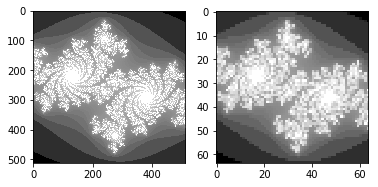

In [45]:
img_resize = cv2.resize(img, (64, 64))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_resize)

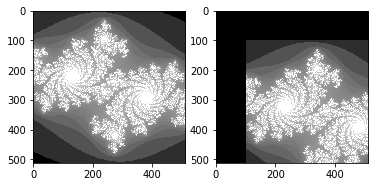

In [46]:
m = np.float32([[1, 0, 100],
                [0, 1, 100]])
shape = img.shape
img_trans = cv2.warpAffine(img, m, (shape[0], shape[1]))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_trans)

[[  1.   0.  50.]
 [  0.   1.  50.]]


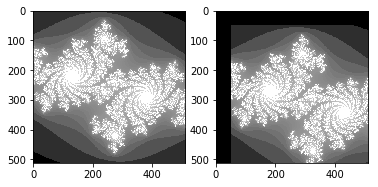

In [47]:
shape = img.shape

p1 = np.float32([[0,0], [0,50], [50,0]])#原圖三個點
p2 = np.float32([[50,50], [50,100], [100,50]])#移至三個點

m = cv2.getAffineTransform(p1, p2)
print m

img_trans = cv2.warpAffine(img, m, (shape[0], shape[1]))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_trans)

[[  1.64102564e+00   5.07039851e-15  -1.45735594e-12]
 [  3.20512821e-01   1.00000000e+00  -9.74395911e-13]
 [  1.25200321e-03   1.38082087e-17   1.00000000e+00]]


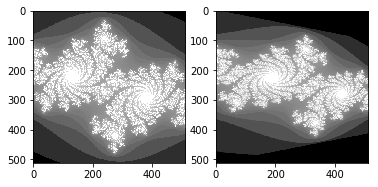

In [48]:
shape = img.shape

p1 = np.float32([[0, 0], [0, 512], [512, 0], [512, 512]])#原圖四個點
shift_A = 0
shift_B = 100
p2 = np.float32([[0, shift_A], [0, 512 - shift_A], [512, shift_B], [512, 512 - shift_B]])#移至四個點

m = cv2.getPerspectiveTransform(p1, p2)
print m

img_trans = cv2.warpPerspective(img, m, (shape[0], shape[1]))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(img_trans)

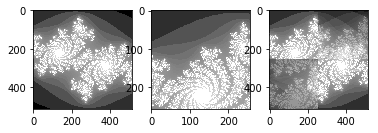

In [49]:
img_paste = img.copy()
img_cut = img_paste[0: 256, 0: 256, :]
img_roi1 = img_paste[0: 256, 256: 512, :]
img_roi2 = img_paste[256: 512, 0: 256,  :]
cv2.addWeighted(img_roi1, 0.5, img_cut, 0.5, 0, img_roi1)
cv2.addWeighted(img_roi2, 0.5, img_cut, 0.5, 0, img_roi2)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(img_cut)

plt.subplot(1, 3, 3)
plt.imshow(img_paste)

原始碼
https://github.com/opencv/opencv/blob/45f0cf0d41170398d44612f69b574bae23f57e2f/modules/imgproc/src/drawing.cpp

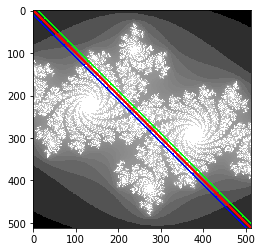

In [39]:
img_line = img.copy()
cv2.line(img_line, (0, 0), (512, 512), (255, 0, 0), 3, cv2.LINE_8)
cv2.line(img_line, (10, 0), (512, 502), (0, 255, 0), 3, cv2.LINE_8)
cv2.line(img_line, (0, 10), (502, 512), (0, 0, 255), 3, cv2.LINE_8)
plt.imshow(img_line)

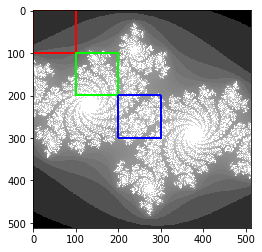

In [42]:
img_rect = img.copy()
cv2.rectangle(img_rect, (0, 0), (100, 100), (255, 0, 0), 3, cv2.LINE_8)
cv2.rectangle(img_rect, (100, 100), (200, 200), (0, 255, 0), 3, cv2.LINE_8)
cv2.rectangle(img_rect, (200, 200), (300, 300), (0, 0, 255), 3, cv2.LINE_8)
plt.imshow(img_rect)

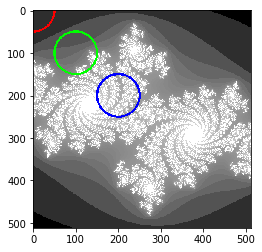

In [50]:
img_circle = img.copy()
cv2.circle(img_circle, (0, 0), 50, (255, 0, 0), 3, cv2.LINE_8)
cv2.circle(img_circle, (100, 100), 50, (0, 255, 0), 3, cv2.LINE_8)
cv2.circle(img_circle, (200, 200), 50, (0, 0, 255), 3, cv2.LINE_8)
plt.imshow(img_circle)

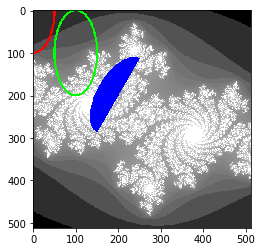

In [69]:
img_ellipse = img.copy()
cv2.ellipse(img_ellipse, (0, 0), (50, 100), 0, 0, 360, (255, 0, 0), 3, cv2.LINE_8)
cv2.ellipse(img_ellipse, (100, 100), (50, 100), 0, 0, 360, (0, 255, 0), 3, cv2.LINE_8)
cv2.ellipse(img_ellipse, (200, 200), (50, 100), 30, 90, 270, (0, 0, 255), -1, cv2.LINE_8)
plt.imshow(img_ellipse)

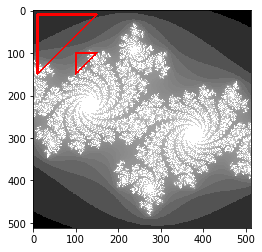

In [88]:
#cv2.fillPoly.__doc__
img_polylines = img.copy()
polys = np.int32([[(10, 10), (150, 10), (10, 150)], 
                  [(100, 100), (150, 100), (100, 150)]])
cv2.polylines(img_polylines, polys, 1, (255, 0, 0), 3, cv2.LINE_8)
plt.imshow(img_polylines)

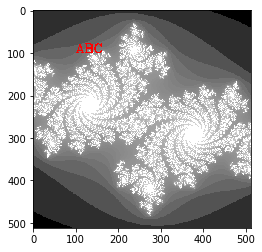

In [95]:
img_text = img.copy()
text = "ABC"
org = (100, 100)
fontFace = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img_text, text, org, fontFace, 1, (255, 0 , 0), 2)
plt.imshow(img_text)